# Exploratory analysis

This is the first step when analyzing time series data. We will use a time series data (http://otexts.com/fpp2/extrafiles/tute1.csv) as an example. Sales contains the quarterly sales for a small company over the period 1981-2005. AdBudget is the advertising budget and GDP is the gross domestic product.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tute_df = pd.read_csv('http://otexts.com/fpp2/extrafiles/tute1.csv')
tute_df

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1
...,...,...,...,...
95,Dec-04,1018.7,634.9,284.0
96,Mar-05,1112.5,663.1,270.9
97,Jun-05,997.4,583.3,294.7
98,Sep-05,826.8,508.6,292.2


To use the dates efectively, we need to covert this column to datetime type and assign it as the index.

In [0]:
tute_df['datetime'] = pd.to_datetime(tute_df.iloc[:,0], format='%b-%y')
tute_df.set_index('datetime', inplace=True)
tute_df.drop('Unnamed: 0', axis=1, inplace=True)
tute_df

,Sales,AdBudget,GDP
datetime,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1
...,...,...,...
2004-12-01,1018.7,634.9,284.0
2005-03-01,1112.5,663.1,270.9
2005-06-01,997.4,583.3,294.7


## Plot the time series

The first thing to do in any data analysis task is to plot the data.

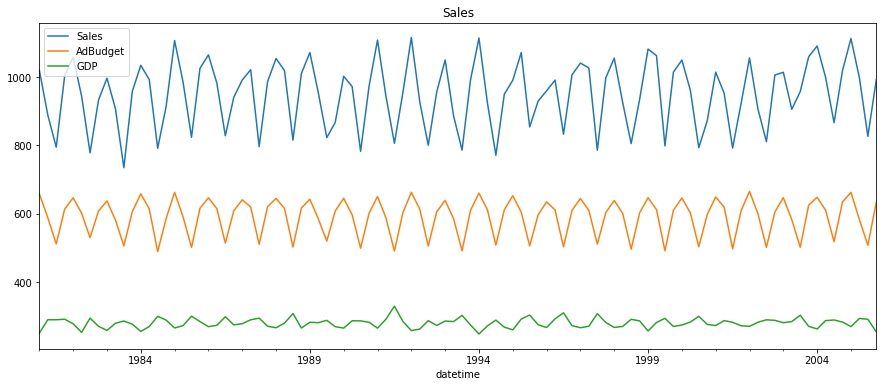

In [0]:
tute_df.plot(figsize=(15,6), title='Sales')
plt.show()

There is no apparent trend in the data over this period. The monthly sales and AdBudget show strong seasonality within each year.

## Seasonal plot

 A seasonal plot allows the underlying seasonal pattern to be seen more clearly, and is especially useful in identifying years in which the pattern changes. 

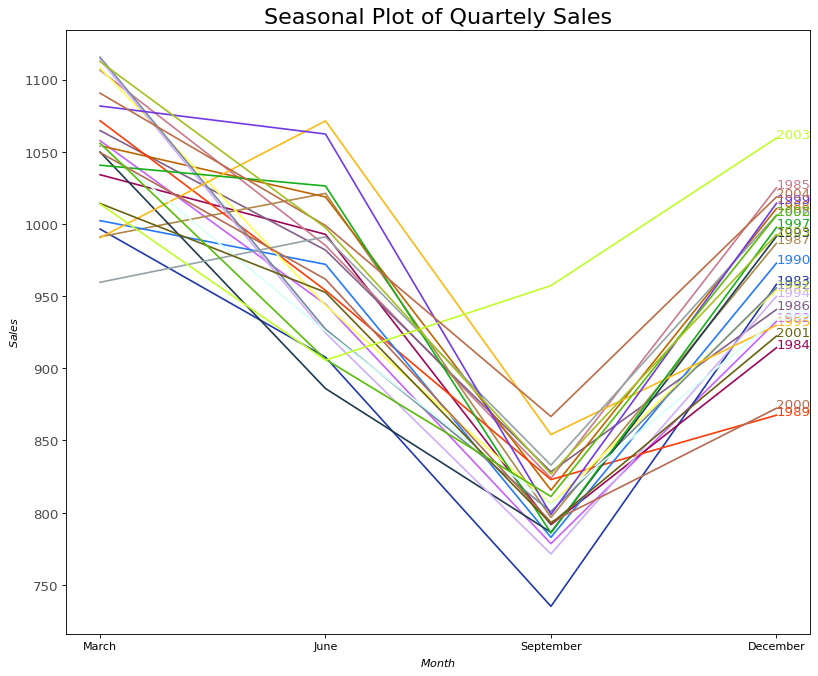

In [0]:
# Prepare data
tute_df['year'] = tute_df.index.year
tute_df['month'] = tute_df.index.month
years = tute_df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(12,10), dpi= 80)
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'Sales', data=tute_df.loc[tute_df.year==y, :], color=mycolors[i], label=y)
    plt.text(12, tute_df.loc[tute_df.year==y, 'Sales'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='$Sales$', xlabel='$Month$')
plt.xticks([3,6,9,12], ['March','June','September', 'December'])
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Quartely Sales", fontsize=20)
plt.show()

The sales increase at the end of the year and decreased between March and September.



## Scatterplots

We can study the relationship between Sales and AdBudget by plotting one series against the other, using a scatterplot.

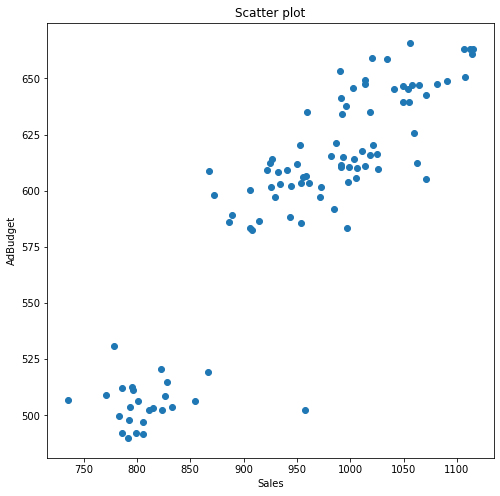

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(tute_df.Sales, tute_df.AdBudget)
plt.title('Scatter plot')
plt.xlabel('Sales')
plt.ylabel('AdBudget')
plt.show()

We can see a positive correlation between both variables. If we are interested in exploring the relation between all variables, we can use a scatterplot matrix.

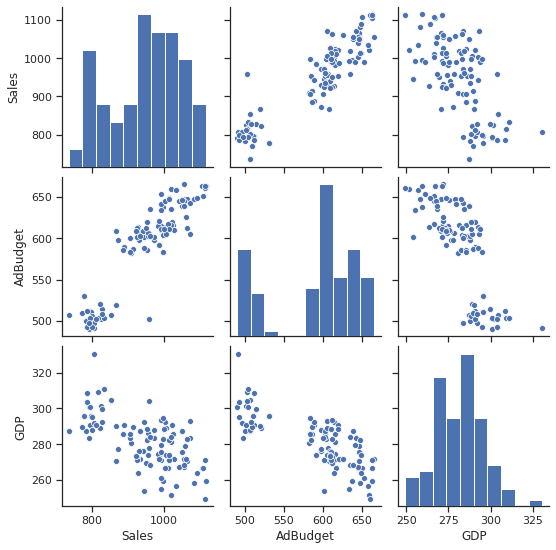

In [0]:
sns.set(style="ticks")
sns.pairplot(tute_df.loc[:, ['Sales','AdBudget','GDP']])
plt.show()

Here, we can see a negative correlation between Sales and AdBudget against GDP. The main diagonal shows the distribution of the variables.

## Autocorrelation

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series. For example, we can measure the relationship between the sales at quarter _t_ and _t-1_, _t_ and _t-2_, and so on.

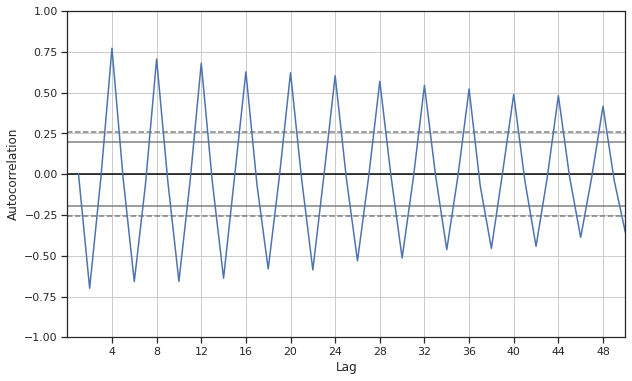

In [0]:
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(tute_df.Sales)
plt.xticks(range(4,50,4))
plt.xlim((0,50))
plt.show()

Attending to the seasonality we observed in the data, we can see a strong positive autocorrelation between the quarters (_t_ and _t-4_, t and _t-8_, etc). On the other hand, we observe a negative autocorrelation because troughs tend to be two quarters behind peaks.